# Applying Advanced Transformations
Cameron Peace


## Task

<mark><u>**I. Clean the files and combine them into one final DataFrame.**

This dataframe should have the following columns:

* [x] Hero (Just the name of the Hero)
* [x] Publisher
* [x] Gender
* [x] Eye color
* [x] Race
* [x] Hair color
* [x] Height (numeric)
* [x] Skin color
* [x] Alignment
* [x] Weight (numeric)
* [x] Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
    * Agility
    * Flight
    * Superspeed
    * etc.

<mark><u>**II. Use your combined DataFrame to answer the following questions.**

* [x] Compare the average weight of super heroes who have Super Speed to those who do not.
    * Super Speed heroes: 129.40 kg average weight
    * Non Super Speed heroes: 101.77 kg average weight
* [x] What is the average height of heroes for each publisher?
    * Image Comics: &emsp;	211.00
    * Marvel Comics: &emsp;	191.55
    * DC Comics: &emsp;	181.92
    * Star Trek: &emsp;	181.50
    * Team Epic: &emsp; TV	180.75
    * Unknown: &emsp;	178.00
    * Dark Horse Comics: &emsp;	176.91
    * Shueisha: &emsp;	171.50
    * George Lucas: &emsp;	159.60

## Data Dictionary

* **Row Identification** - index
* **name** 
* **Gender** 
* **Eye color** 
* **Race** 
* **Hair color** 
* **Height** - The height measured in centimeters
* **Publisher** - comics publisher
* **Skin color**
* **Alignment** - (good, bad, neutral, unknown)
* **Weight** - The weight measured in pounds

### Data Background

This dataset is a modified version of a dataset found [here](https://www.kaggle.com/datasets/claudiodavi/superhero-set) on kaggle.  It has been altered by Coding Dojo for educational purposes.

## Imports, Loading, Viewing Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json

# settings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)

In [2]:
# loading the data
df_info = pd.read_csv('superhero_info.csv')
df_powers = pd.read_csv('superhero_powers.csv')

# making a copy
df_info_original = df_info.copy()
df_powers_original = df_powers.copy()

#### Viewing Superhero info df

In [3]:
# viewing superhero info
display(df_info.head())
display(df_info.info(), df_info.describe(), df_info.columns)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


None

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
count,463,463,463,463,463,463,463,463
unique,457,3,52,4,29,21,14,287
top,Spider-Man|Marvel Comics,Male,Human,good,Black,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '90.0 kg'}"
freq,3,321,156,311,127,182,409,6


Index(['Hero|Publisher', 'Gender', 'Race', 'Alignment', 'Hair color',
       'Eye color', 'Skin color', 'Measurements'],
      dtype='object')

#### Viewing Superhero powers df

In [4]:
# viewing the data
display(df_powers.head())
display(df_powers.info(), df_powers.describe(), df_powers.columns)

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


None

,hero_names,Powers
count,667,667
unique,667,608
top,3-D Man,Intelligence
freq,1,8


Index(['hero_names', 'Powers'], dtype='object')

<mark><u>**Comment:**

* <font color='dodgerblue' size=4><i>
We'll have to split the name/publisher and join with the other df on name here.  I'm going to do this first so I can consolidate into one df.
* <font color='dodgerblue' size=4><i> 
We have a little over 200 more entries for the hero powers dataset than the primary dataset.  I think for our purposes it makes sense to drop any superheros present in the 'powers' dataset that we don't have other information on.  I might consider doing a outer join just to view what we're missing from each.
<font color='dodgerblue' size=4>


## Cleaning

### Splitting name/publisher to two columns

In [5]:
# making the new columns
df_info[['name', 'publisher']] = df_info['Hero|Publisher'].str.split('|', expand=True)

# confirmings
df_info[['name', 'publisher', 'Hero|Publisher']].head()

,name,publisher,Hero|Publisher
0,A-Bomb,Marvel Comics,A-Bomb|Marvel Comics
1,Abe Sapien,Dark Horse Comics,Abe Sapien|Dark Horse Comics
2,Abin Sur,DC Comics,Abin Sur|DC Comics
3,Abomination,Marvel Comics,Abomination|Marvel Comics
4,Absorbing Man,Marvel Comics,Absorbing Man|Marvel Comics


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Looks good, we can now drop the combined column ('Hero/Publisher')
</i></font>

In [6]:
# dropping 'Hero/Publisher column'
df_info = df_info.drop(columns='Hero|Publisher').copy()

# confirming
df_info.columns

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Measurements', 'name', 'publisher'],
      dtype='object')

### Joining Dataframes

In [7]:
# joining with a outer join to see where we are missing data from df_info
df_all = df_info.merge(df_powers, left_on='name', right_on='hero_names', how='outer')

In [8]:
# viewing
display(df_all.sample(5))

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,name,publisher,hero_names,Powers
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Garbage Man,Accelerated Healing
538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy,"Flight,Electrokinesis,Energy Manipulation"
198,Female,Asgardian,bad,Black,green,Unknown,"{'Height': '213.0 cm', 'Weight': '225.0 kg'}",Hela,Marvel Comics,Hela,"Agility,Accelerated Healing,Durability,Longevi..."
350,Male,Human,good,Red,blue,Unknown,"{'Height': '168.0 cm', 'Weight': '63.0 kg'}",Rorschach,DC Comics,Rorschach,"Agility,Stealth,Weapons Master,Intelligence,St..."
577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kid Flash,"Accelerated Healing,Super Speed"


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
After reviewing the results of the full join in greater depth, it does not appear that we have dirty data that would result in superheros dropped which should be added to our final dataset.  There are simply superheros in the 'powers' dataset that do not appear in the 'info' set.  It makes sense to just do an inner join and lose the superheros for which we do not have information, especially considering that we are trying to answer a question regarding average weight.
</i></font>

In [9]:
# joining dfs
df = df_info.merge(df_powers, left_on='name', right_on='hero_names')

# making a copy for comparison if needed
df_original = df.copy()

In [10]:
# viewing the new df
display(df.info(), df.sample(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   name          463 non-null    object
 8   publisher     463 non-null    object
 9   hero_names    463 non-null    object
 10  Powers        463 non-null    object
dtypes: object(11)
memory usage: 43.4+ KB


None

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,name,publisher,hero_names,Powers
426,Male,Inhuman,good,No Hair,green,green,"{'Height': '188.0 cm', 'Weight': '86.0 kg'}",Triton,Marvel Comics,Triton,"Agility,Cold Resistance,Durability,Underwater ..."
310,Male,Unknown,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '89.0 kg'}",Penance II,Marvel Comics,Penance II,Energy Blasts
146,Female,Unknown,good,Blond,blue,Unknown,"{'Height': '178.0 cm', 'Weight': '65.0 kg'}",Emma Frost,Marvel Comics,Emma Frost,"Durability,Super Strength,Telepathy,Density Co..."


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Our join looks good, we can now drop 'hero_names', as it's redundant.  We are now working with 463 heroes (the heroes that we have more extensive info on, from df_info dataframe) 
</i></font>

In [11]:
# dropping 'hero_names'
df = df.drop(columns='hero_names').copy()

# confirming
df.columns

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Measurements', 'name', 'publisher', 'Powers'],
      dtype='object')

### Fixing Column Names

In [12]:
# changing column names to snakecase
df = df.rename(columns = lambda x: '_'.join(x.lower().split()))

# confirming
df.columns

Index(['gender', 'race', 'alignment', 'hair_color', 'eye_color', 'skin_color',
       'measurements', 'name', 'publisher', 'powers'],
      dtype='object')

### Checking for Duplicates and Missing Values

In [13]:
# duplicate check
df.duplicated().sum()

0

In [14]:
df.isna().sum().sum()

0

### Checking for incorrect values

In [15]:
# checking for redundant or incorrect values
for i in df.columns:
    if df[i].nunique() <= 30:
        print('***' + i.upper(), df[i].unique())

***GENDER ['Male' 'Female' 'Unknown']
***ALIGNMENT ['good' 'bad' 'Unknown' 'neutral']
***HAIR_COLOR ['No Hair' 'Blond' 'Brown' 'Unknown' 'White' 'Black' 'Purple' 'Orange'
 'Pink' 'Red' 'Auburn' 'Strawberry Blond' 'black' 'Blue' 'Green' 'Magenta'
 'Brown / White' 'blond' 'Silver' 'Red / Grey' 'Grey' 'Orange / White'
 'Yellow' 'Brownn' 'Gold' 'Red / Orange' 'Indigo' 'Red / White'
 'Black / Blue']
***EYE_COLOR ['yellow' 'blue' 'green' 'brown' 'Unknown' 'red' 'violet' 'white' 'purple'
 'black' 'silver' 'grey' 'yellow (without irises)' 'gold' 'blue / white'
 'hazel' 'green / blue' 'white / red' 'indigo' 'amber' 'yellow / blue']
***SKIN_COLOR ['Unknown' 'blue' 'red' 'black' 'grey' 'gold' 'green' 'white' 'pink'
 'silver' 'yellow' 'purple' 'blue-white' 'orange']
***PUBLISHER ['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'Team Epic TV'
 'George Lucas' 'Shueisha' 'Star Trek' 'Unknown' 'Image Comics']


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
I see no errors here, we have 'Unknown' values in our columns.  These may be equivalent to missing values in some cases, but may be legitimate in other cases (e.g. 'Unknown' alignment of hero, 'unknown' skin color due to costume).
</i></font>

### Splitting 'measurements' into Height, Weight columns

In [16]:
df.head()

,gender,race,alignment,hair_color,eye_color,skin_color,measurements,name,publisher,powers
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,"Accelerated Healing,Durability,Longevity,Super..."
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,"Agility,Accelerated Healing,Cold Resistance,Du..."
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,Lantern Power Ring
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,"Accelerated Healing,Intelligence,Super Strengt..."
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,"Cold Resistance,Durability,Energy Absorption,S..."


In [17]:
df['measurements'].dtype

dtype('O')

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
We have a column of dictionaries as strings, we'll convert them into dictionaries first, then separate the two measurements into distinct columns
</i></font>

In [18]:
# changing the single quotes to double for the json loads function
df['measurements'] = df['measurements'].str.replace("'", '"')

# changing string to dict
df['measurements'] = df['measurements'].apply(json.loads)

In [19]:
# confirming
type(df.loc[0,'measurements'])

dict

In [20]:
# splitting 'measurements' into two columns
height_weight = df['measurements'].apply(pd.Series)
height_weight.head()

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg


In [21]:
# pasting columns back on to the original dataframe
df = pd.concat((df, height_weight), axis=1)

In [22]:
# renaming columns
df = df.rename(columns={'Height': 'height_cm', 'Weight': 'weight_kg'})

# dropping 'measurements' since it's now redundant
df = df.drop(columns='measurements').copy()

In [23]:
# removing the units from 'weight' and 'height' and expresssing them as floats
df['height_cm'] = df['height_cm'].apply(lambda x: x.split()[0]).astype(float)
df['weight_kg'] = df['weight_kg'].apply(lambda x: x.split()[0]).astype(float)

In [24]:
# confirming all changes
display(df.dtypes, df.head())

gender         object
race           object
alignment      object
hair_color     object
eye_color      object
skin_color     object
name           object
publisher      object
powers         object
height_cm     float64
weight_kg     float64
dtype: object

,gender,race,alignment,hair_color,eye_color,skin_color,name,publisher,powers,height_cm,weight_kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,"Accelerated Healing,Durability,Longevity,Super...",203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,"Agility,Accelerated Healing,Cold Resistance,Du...",191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,Lantern Power Ring,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,"Accelerated Healing,Intelligence,Super Strengt...",203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,"Cold Resistance,Durability,Energy Absorption,S...",193.0,122.0


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
All looks good!  I'm going to reorder the columns a little to an order that I think makes more sense
</i></font>

In [25]:
df.columns

Index(['gender', 'race', 'alignment', 'hair_color', 'eye_color', 'skin_color',
       'name', 'publisher', 'powers', 'height_cm', 'weight_kg'],
      dtype='object')

In [26]:
# reordering columns
df = df[['name', 'race', 'gender', 'height_cm', 'weight_kg', 'alignment', 
        'hair_color', 'eye_color', 'skin_color', 'publisher', 'powers']].copy()

# confirming
df.head(2)

,name,race,gender,height_cm,weight_kg,alignment,hair_color,eye_color,skin_color,publisher,powers
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,"Accelerated Healing,Durability,Longevity,Super..."
1,Abe Sapien,Icthyo Sapien,Male,191.0,65.0,good,No Hair,blue,blue,Dark Horse Comics,"Agility,Accelerated Healing,Cold Resistance,Du..."


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Everything looks good here, we may be able to snap the 'height' and 'weight' to int, but I'm going to leave them as floats because I think that makes more sense, considering the continuous nature of these two measurements.
</i></font>

### Turning 'powers' into One Hot Encoded columns

In [27]:
# turning the string values into a list for each entry
df['powers'] = df['powers'].str.split(',')

In [28]:
# creating a df with 'powers' column exploded
powers_exploded = df.explode('powers')

# confirming
powers_exploded.head()

,name,race,gender,height_cm,weight_kg,alignment,hair_color,eye_color,skin_color,publisher,powers
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,Accelerated Healing
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,Durability
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,Longevity
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,Super Strength
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,Stamina


In [29]:
# making a list of all unique powers to make distinct columns
cols_to_make = powers_exploded['powers'].dropna().unique()

# confirming
cols_to_make

array(['Accelerated Healing', 'Durability', 'Longevity', 'Super Strength',
       'Stamina', 'Camouflage', 'Self-Sustenance', 'Agility',
       'Cold Resistance', 'Underwater breathing', 'Marksmanship',
       'Weapons Master', 'Intelligence', 'Telepathy', 'Immortality',
       'Reflexes', 'Enhanced Sight', 'Sub-Mariner', 'Lantern Power Ring',
       'Super Speed', 'Invulnerability', 'Animation', 'Super Breath',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Molecular Manipulation',
       'Heat Resistance', 'Matter Absorption', 'Stealth', 'Flight',
       'Power Suit', 'Energy Blasts', 'Energy Beams', 'Power Cosmic',
       'Heat Generation', 'Danger Sense', 'Teleportation', 'Phasing',
       'Force Fields', 'Hypnokinesis', 'Energy Manipulation',
       'Invisibility', 'Enhanced Senses', 'Jump', 'Substance Secretion',
       'Natural Weapons', 'Wallcrawling', 'Vision - Thermal',
       'Power Augmentation', 'Cryokinesis', 'Dupli

In [30]:
# creating separate one hot encoded columns for each power 
for i in cols_to_make:
    df[i] = df['powers'].apply(lambda x: 1 if i in x else 0)

# confirming
df.sample(7)

,name,race,gender,height_cm,weight_kg,alignment,hair_color,eye_color,skin_color,publisher,...,Hair Manipulation,Weather Control,Nova Force,Odin Force,Phoenix Force,Power Sense,Qwardian Power Ring,Melting,Changing Armor,Terrakinesis
252,Longshot,Human,Male,188.0,36.0,good,Blond,blue,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
424,Trickster,Human,Male,183.0,81.0,Unknown,Blond,blue,Unknown,DC Comics,...,0,0,0,0,0,0,0,0,0,0
169,Gambit,Mutant,Male,185.0,81.0,good,Brown,red,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
38,Azazel,Neyaphem,Male,183.0,67.0,bad,Black,yellow,red,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
300,Nightcrawler,Unknown,Male,175.0,88.0,good,Indigo,yellow,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
270,Mera,Atlantean,Female,175.0,72.0,good,Red,blue,Unknown,DC Comics,...,0,0,0,0,0,0,0,0,0,0


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Everything looks like it worked here, we can now drop the redundant 'powers' column.
</i></font>

In [31]:
# dropping 'powers'
df = df.drop(columns='powers').copy()

In [32]:
# confirming with an in statement since we have so many columns now
'powers' in df.columns

False

### Viewing Final Cleaned up DataFrame

In [33]:
display(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 169 entries, name to Terrakinesis
dtypes: float64(2), int64(159), object(8)
memory usage: 631.1+ KB


,name,race,gender,height_cm,weight_kg,alignment,hair_color,eye_color,skin_color,publisher,...,Hair Manipulation,Weather Control,Nova Force,Odin Force,Phoenix Force,Power Sense,Qwardian Power Ring,Melting,Changing Armor,Terrakinesis
0,A-Bomb,Human,Male,203.0,441.0,good,No Hair,yellow,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,Icthyo Sapien,Male,191.0,65.0,good,No Hair,blue,blue,Dark Horse Comics,...,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,Ungaran,Male,185.0,90.0,good,No Hair,blue,red,DC Comics,...,0,0,0,0,0,0,0,0,0,0
3,Abomination,Human / Radiation,Male,203.0,441.0,bad,No Hair,green,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0
4,Absorbing Man,Human,Male,193.0,122.0,bad,No Hair,blue,Unknown,Marvel Comics,...,0,0,0,0,0,0,0,0,0,0


None

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
We should be good to go with our first task here.
</i></font>

## Comparing weights for heroes with 'super speed'

In [34]:
# segmenting into super speed and non super speed
speedy = df[df['Super Speed'] == 1]
non_speedy = df[df['Super Speed'] == 0]

# confirming
display(df.shape, speedy.shape, non_speedy.shape, 
        speedy[['name', 'Super Speed']].head(),
        non_speedy[['name', 'Super Speed']].head())

(463, 169)

(198, 169)

(265, 169)

,name,Super Speed
3,Abomination,1
5,Adam Strange,1
8,Air-Walker,1
9,Ajax,1
10,Alan Scott,1


,name,Super Speed
0,A-Bomb,0
1,Abe Sapien,0
2,Abin Sur,0
4,Absorbing Man,0
6,Agent Bob,0


In [35]:
# finding average weights of speedy vs non speedy heroes
print(f"The average weight of heroes with Super Speed: \
              {speedy['weight_kg'].mean():.2f} kg")
print(f"The average weight of heroes without Super Speed: \
              {non_speedy['weight_kg'].mean():.2f} kg")

The average weight of heroes with Super Speed:               129.40 kg
The average weight of heroes without Super Speed:               101.77 kg


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Interesting... So characters with Super Speed on average weigh more compared to those without Super Speed.  I wonder if we have an outlier tipping that value (Juggernaut?).
    
* **Super Speed heroes: 129.40 kg average weight**
* **Non Super Speed heroes: 101.77 kg average weight**
</i></font>

In [36]:
display(speedy['weight_kg'].describe(), non_speedy['weight_kg'].describe())

count    198.000000
mean     129.404040
std      122.625087
min       14.000000
25%       69.250000
50%       90.000000
75%      135.000000
max      855.000000
Name: weight_kg, dtype: float64

count    265.000000
mean     101.773585
std       91.745168
min        4.000000
25%       59.000000
50%       79.000000
75%       97.000000
max      900.000000
Name: weight_kg, dtype: float64

In [37]:
display(speedy[['name','weight_kg']].sort_values('weight_kg', ascending=False).head(),
        non_speedy[['name','weight_kg']].sort_values('weight_kg', ascending=False).head())

,name,weight_kg
230,Juggernaut,855.0
118,Darkseid,817.0
337,Red Hulk,630.0
205,Hulk,630.0
77,Bloodaxe,495.0


,name,weight_kg
354,Sasquatch,900.0
173,Giganta,630.0
0,A-Bomb,441.0
378,Solomon Grundy,437.0
308,Onslaught,405.0


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Nope, it looks like even our medians are larger as well and so it seems that characters with Super Speed tend to weigh more on average.
</i></font>

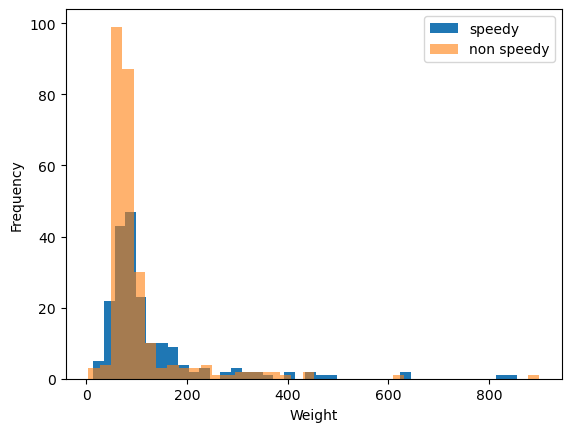

In [38]:
speedy['weight_kg'].plot(kind='hist', bins=40, label='speedy')
non_speedy['weight_kg'].plot(kind='hist', bins=40, label='non speedy', alpha=.6)
plt.xlabel('Weight')
plt.legend();

## Comparing average hero height by publisher

In [39]:
# using groupby to answer this question
(df
     .groupby('publisher')
     ['height_cm'].mean()
     .reset_index(name='average_height')
     .sort_values('average_height', ascending=False)
)

,publisher,average_height
3,Image Comics,211.000000
4,Marvel Comics,191.546128
0,DC Comics,181.923913
6,Star Trek,181.500000
7,Team Epic TV,180.750000
8,Unknown,178.000000
1,Dark Horse Comics,176.909091
5,Shueisha,171.500000
2,George Lucas,159.600000


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
"Image" features the tallest heroes on average (211 cm) and heroes from the works of George Lucas tend to be the shortest on average (159 cm). (Yoda perhaps?)
</i></font>

In [40]:
df[df['publisher'] == 'Image Comics'][['name', 'height_cm']]

,name,height_cm
381,Spawn,211.0


In [41]:
df[df['publisher'] == 'George Lucas'][['name', 'height_cm']]

,name,height_cm
120,Darth Vader,198.0
189,Han Solo,183.0
214,Indiana Jones,183.0
254,Luke Skywalker,168.0
460,Yoda,66.0


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Okay, so clearly the unbalanced dataset is skewing these numbers.  We have only 1 entry for "Image Comics" (Spawn) and he happens to be tall.  We have only 5 entries for "George Lucas" and 1 of those entries is Yoda, who is famously diminutive in stature.
</i></font>